Problem Statement 1: The data (sample) were collected in São Paulo — Brazil, in a university,
where there are some parties with groups of students from 18 to 28 years of age (average). The
dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have
to predict the quantity of beer consumption based on the features that contain climate
conditions.

Dataset Description:
I. Data: date of the record
II. Temperatura Media (C): Average temperature of the day in celsius
III. Temperatura Minima (C): Minimum temperature of the day in celsius
IV. Temperatura Maxima (C): Maximum temperature of the day in celsius
V. Precipitacao (mm): Percipitation in mm
VI. Final de Semana: If the day is the weekend or not
VII. Consumo de cerveja (litros): Beer consumption in liters
Write a Python code to perform the following tasks mentioned:
1. Load the dataset, check its shape
2. Rectify the data of the first four columns
Hint: Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura
Maxima (C)', and 'Precipitac’
Fix the following errors present in these features
3. Create new features using the 'Data' feature and the make 'Data' column as index
Hint: Create a new feature 'Month' from the dates, consisting of the month of the year.
Create a new feature 'Day' from the dates, consisting of the day of the week.
Set values from the 'Data' column as indexes. Use code snippet:
df1.set_index('Data',inplace=True)
4. Handle null and duplicate values
5. Check the data type of the features and convert them to the appropriate data type
6. Analyze features with outlier values
7. Plot and analyze the correlation
8. Split the dataset for training and testing
9. Train a linear regression model and print the intercept and coefficients
10. Evaluate the model using the R2 score, mean absolute error, and root mean squared
error

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv("Consumo_cerveja.csv")

In [4]:
df.shape

(941, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [6]:
df.iloc[:,1:5] = df.iloc[:,1:5].astype('string') 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    string 
 2   Temperatura Minima (C)       365 non-null    string 
 3   Temperatura Maxima (C)       365 non-null    string 
 4   Precipitacao (mm)            365 non-null    string 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(1), string(4)
memory usage: 51.6+ KB


In [8]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.')
df['Temperatura Minima (C)' ] = df['Temperatura Minima (C)'].str.replace(',', '.')
df['Temperatura Maxima (C)' ] = df['Temperatura Maxima (C)' ].str.replace(',', '.')
df['Precipitacao (mm)'] = df['Precipitacao (mm)' ].str.replace(',', '.')

In [9]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [10]:
df[["Year", "Month", "Date"]] = df["Data"].str.split("-", expand = True)

In [11]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Date
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,2015,01,01
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,2015,01,02
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,2015,01,03
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,2015,01,04
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,2015,01,05


In [12]:
df.set_index('Data',inplace=True)

In [13]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Date
Data,,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,2015,01,01
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,2015,01,02
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,2015,01,03
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,2015,01,04
2015-01-05,23.82,21,28.3,0,0.0,28.900,2015,01,05


In [14]:
df.isnull().sum()

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Year                           576
Month                          576
Date                           576
dtype: int64

In [15]:
df.dropna( inplace=True)

In [16]:
df.isnull().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Year                           0
Month                          0
Date                           0
dtype: int64

In [17]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Date
Data,,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,2015,01,01
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,2015,01,02
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,2015,01,03
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,2015,01,04
2015-01-05,23.82,21,28.3,0,0.0,28.900,2015,01,05


In [18]:
df.shape

(365, 9)

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    string 
 1   Temperatura Minima (C)       365 non-null    string 
 2   Temperatura Maxima (C)       365 non-null    string 
 3   Precipitacao (mm)            365 non-null    string 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Year                         365 non-null    object 
 7   Month                        365 non-null    object 
 8   Date                         365 non-null    object 
dtypes: float64(2), object(3), string(4)
memory usage: 28.5+ KB


In [21]:
df = df.astype(float)

In [22]:
df.iloc[:,6:] = df.iloc[:,6:].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Year                         365 non-null    int64  
 7   Month                        365 non-null    int64  
 8   Date                         365 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 28.5+ KB


In [24]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Date
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,2015.0,6.526027,15.720548
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,0.0,3.452584,8.808321
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,2015.0,1.000000,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,2015.0,4.000000,8.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,2015.0,7.000000,16.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,2015.0,10.000000,23.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,2015.0,12.000000,31.000000


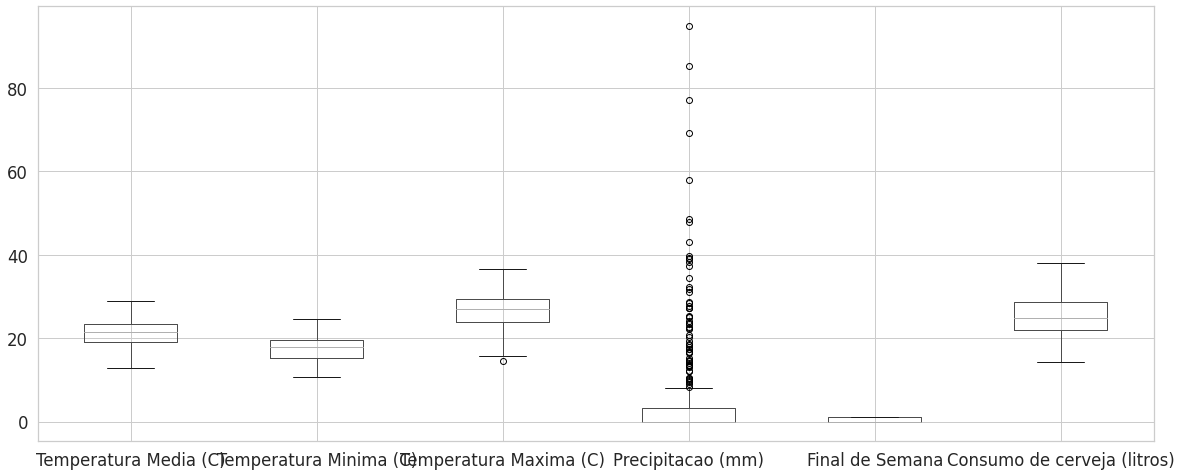

In [26]:
df.iloc[:,0:6].boxplot()
sns.set(rc={'figure.figsize':(20,8)}, font_scale=1.5, style='whitegrid')
# outliers present in Precipitacao (mm) 

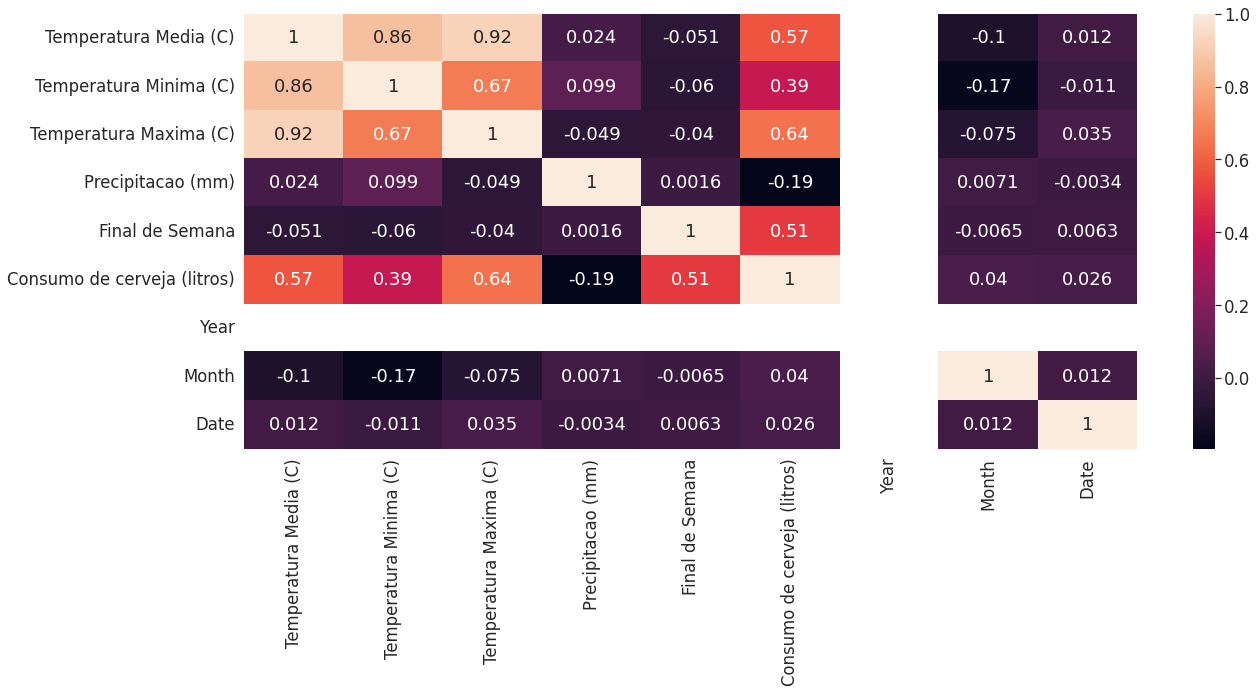

In [27]:
sns.heatmap(df.corr(),annot =True)

In [28]:
df.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)', 'Year', 'Month', 'Date'],
      dtype='object')

In [29]:
X = df[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']]
X.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
Data,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0
2015-01-02,27.02,24.5,33.5,0.0,0.0
2015-01-03,24.82,22.4,29.9,0.0,1.0
2015-01-04,23.98,21.5,28.6,1.2,1.0
2015-01-05,23.82,21.0,28.3,0.0,0.0


In [30]:
y = df['Consumo de cerveja (litros)']
y.head()

Data
2015-01-01    25.461
2015-01-02    28.972
2015-01-03    30.814
2015-01-04    29.799
2015-01-05    28.900
Name: Consumo de cerveja (litros), dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=200)

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)
Lr.coef_
Lr.intercept_
print(f"Lr.coef_: {Lr.coef_} and Lr.intercept_: {Lr.intercept_} ")

Lr.coef_: [ 0.04163846 -0.05893875  2.80185498 -0.65230191  2.295399  ] and Lr.intercept_: 25.560250000000003 


In [34]:
pred = Lr.predict(X_test)

In [35]:
pred[:5]

array([25.18125283, 26.11401182, 28.07145958, 24.92905998, 30.2475756 ])

In [36]:
y_test[:5]

Data
2015-12-08    27.713
2015-11-18    23.614
2015-12-15    28.617
2015-12-10    22.933
2015-12-06    32.780
Name: Consumo de cerveja (litros), dtype: float64

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
print("r2_score:",r2_score(y_test, pred))
print("mean_absolute_error:",mean_absolute_error(y_test, pred))
print("mean_squared_error:",mean_squared_error(y_test, pred))
print("Root mean_squared_error:",math.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.7648629730153845
mean_absolute_error: 1.9507387053624128
mean_squared_error: 5.425724654088256
Root mean_squared_error: 2.329318495630912


Problem Statement 2: You are provided with the California housing dataset. Based on the given
parameters of a house, predict its price.
Dataset Description:
The dataset contains nine features:

I. longitude: A measure of how far west a house is; a higher value is farther west
II. latitude: A measure of how far north a house is; a higher value is farther north
III. housingMedianAge: Median age of a house within a block; a lower number is a newer
building

IV. total rooms: Total number of rooms within a block

V. total bedrooms: Total number of bedrooms within a block

VI. population: Total number of people residing within a block

VII. households: Total number of households, a group of people residing within a home unit,
for a block

VIII. median income: Median income for households within a block of houses (measured in
tens of thousands of US Dollars)

IX. median house value: Median house value for households within a block (measured in US
Dollars)

Write a Python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Split the dataset for training and testing - 1000 instances for testing
3. Train the model using sklearn (Apply linear regression to train a model for prediction)
4. Predict the prices on test data and evaluate the model by r2 score and mean absolute
error
5. Find coefficient and intercept using the trained model


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [40]:
df.shape

(17000, 9)

In [41]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [42]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [43]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

In [44]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = .0588, random_state = 42)

In [46]:
X_test.shape

(1000, 8)

In [47]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("lr.intercept_:",lr.intercept_)
print("lr.coef_:", lr.coef_)

lr.intercept_: -3632877.842511549
lr.coef_: [-4.32650586e+04 -4.29877050e+04  1.13224456e+03 -8.24971921e+00
  1.15173391e+02 -3.72835206e+01  4.39458716e+01  4.04437504e+04]


In [49]:
from sklearn.metrics import r2_score,mean_absolute_error
print("R2 score:",r2_score(y_test, pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))

R2 score: 0.6427633944326602
Mean Absolute Error: 52486.711217711076


Problem Statement 3: You are provided with the medical cost dataset. You need to
predict individual medical costs billed by health insurance.
Dataset Description:

I. age: age of the primary beneficiary

II. sex: gender of primary beneficiary female, male

III. bmi: Body mass index, providing an understanding of the body, weights that are relatively
high or low relative to height, an objective index of body

IV. weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

V. children: Number of children covered by health insurance / Number of dependents

VI. smoker: Smokes or not

VII. region: the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest

VIII. charges: Individual medical costs billed by health insurance
Data Science and Machine Learning Internship Program


Write a Python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values (Use One-Hot Encoding)
3. Split the dataset for training and testing
4. Train the model using sklearn – Linear Regression
5. Find the intercept and coefficient from the trained model
6. Predict the prices of test data and evaluate the model using calculated r2 score and root
mean squared error

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
df.shape

(1338, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['sex', 'smoker','region'])

In [56]:
one_hot_encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [57]:
X= one_hot_encoded_data.drop(columns= 'charges')
y = one_hot_encoded_data['charges']

In [58]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [59]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = .2, random_state = 100)

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("lr.intercpt_:", lr.intercept_)
print("lr.coef_:", lr.coef_)

lr.intercpt_: -206.05018831717098
lr.coef_: [ 2.63750608e+02  3.11571755e+02  4.73045625e+02 -6.30763744e+00
  6.30763744e+00 -1.17465727e+04  1.17465727e+04  6.09598800e+02
  2.05975445e+02 -3.07731627e+02 -5.07842618e+02]


In [62]:
import math
from sklearn.metrics import r2_score, mean_squared_error
print("r2_score:",r2_score(y_test, pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.7946968492150815
Root Mean Squared Error: 5673.904567667314


Problem Statement 4: You are provided with the '50_Startups' data. Using the given features,
you must predict the profit of these startups.
Dataset Description:
I. R&D Spend: Expenditures in Research and Development
II. Administration: Expenditures in Administration
III. Marketing Spend: Expenditures in Marketing
IV. State: In which state the company belongs to
V. Profit: The profit made by the company
Write a Python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values using Label Encoder
3. Split the dataset for training and testing
4. Train the model using sklearn (linear regression), also find the intercept and coefficient
from the trained model
5. Predict the profits of test data and evaluate the model using r2 score and mean squared
error
6. Regularize the model using Ridge Regression and find the Score
7. Regularize the model using Lasso Regression and find the Score 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [66]:
df.shape

(50, 5)

In [67]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [68]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['state'] = le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [70]:
X = df.drop (columns = ['State','Profit'])
X.head()

,R&D Spend,Administration,Marketing Spend,state
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [71]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("le.intercept_:",lr.intercept_)
print("le.coef_:", lr.coef_)

le.intercept_: 55613.44850791515
le.coef_: [ 8.16754760e-01 -5.02134441e-02  1.99770860e-02 -1.43943225e+03]


In [74]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2_score",r2_score(y_test,pred))
print("mean squred error", mean_squared_error(y_test,pred))

r2_score 0.8923674690874008
mean squred error 170627724.96626765


In [81]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
ridge = Ridge()
ridge.fit(X_train, y_train)          
pred2 = ridge.predict(X_test)           
print("R2 score:",r2_score(y_test, pred2))    

R2 score: 0.8927117731576847


In [83]:
lasso = Lasso()
lasso.fit(X_train, y_train)
pred3= lasso.predict(X_test)
print("R2 score:", r2_score(y_test,pred3))

R2 score: 0.8923774364025978
